### Get data

In [63]:
import json 
import pandas as pd
import glob

In [64]:
# Load all StreamingHistory JSON files into a single DataFrame
files = glob.glob("../PersonalMusic/data/*Streaming_History*.json")
dfs = []

for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        dfs.append(pd.DataFrame(data))

df = pd.concat(dfs, ignore_index=True)

### Clean Data

In [65]:
df = df.rename(
    columns={
        'master_metadata_track_name': 'track_name',
        'master_metadata_album_artist_name': 'artist_name', 
        'master_metadata_album_album_name': 'album_name'
        })

df['minutes_played'] = df['ms_played']/60000

df['album_with_artist'] = df['album_name'] + ' | ' + df['artist_name']

In [66]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr', 'track_name',
       'artist_name', 'album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'minutes_played',
       'album_with_artist'],
      dtype='object')

In [67]:
df.to_csv('../PersonalMusic/data/compiled_data.csv', index=False)

### Explore Data

In [68]:
artist_playtime = df.groupby('artist_name')['minutes_played'].sum().reset_index()
artist_playtime = artist_playtime.sort_values(by='minutes_played', ascending=False)

album_playtime = df.groupby('album_with_artist')['minutes_played'].sum().reset_index()
album_playtime = album_playtime.sort_values(by='minutes_played', ascending=False)


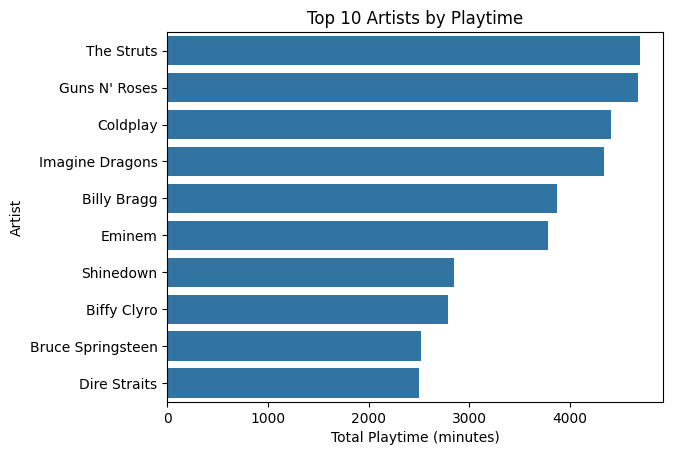

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 artists by playtime
top_artists = artist_playtime.head(10)
sns.barplot(x='minutes_played', y='artist_name', data=top_artists)
plt.title("Top 10 Artists by Playtime")
plt.xlabel("Total Playtime (minutes)")
plt.ylabel("Artist")
plt.show()

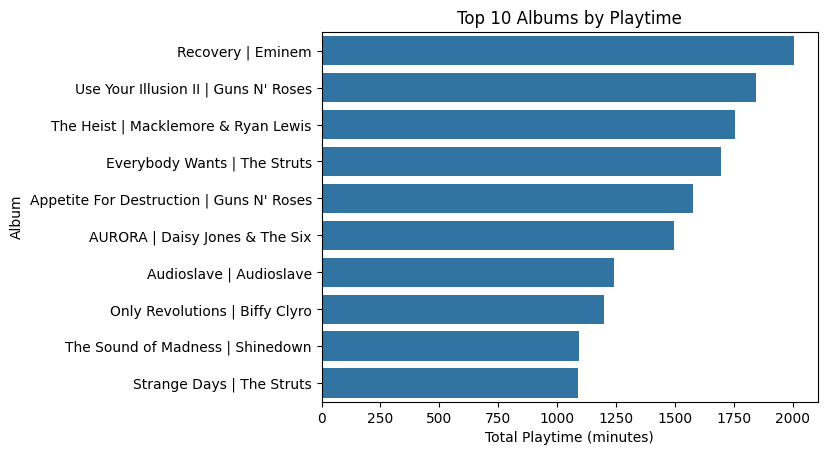

In [70]:
# Plot top 10 artists by playtime
top_albumns = album_playtime.head(10)
sns.barplot(x='minutes_played', y='album_with_artist', data=top_albumns)
plt.title("Top 10 Albums by Playtime")
plt.xlabel("Total Playtime (minutes)")
plt.ylabel("Album")
plt.show()